## 📚 Importación de librerías

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


## 📂 Carga de datos

In [4]:
df = pd.read_csv("../data/raw/medical_insurance_cost.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 🔍 Exploración inicial del dataset

In [5]:
print("Dimensiones:", df.shape)
print(df.info())
df.describe(include='all')


Dimensiones: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## 🔎 Distribución de variables categóricas

In [6]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:\n", df[col].value_counts())



sex:
 sex
male      676
female    662
Name: count, dtype: int64

smoker:
 smoker
no     1064
yes     274
Name: count, dtype: int64

region:
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


## 📊 Visualización de datos

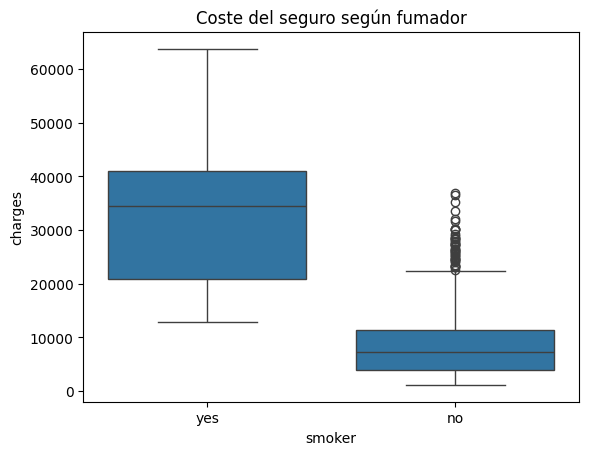

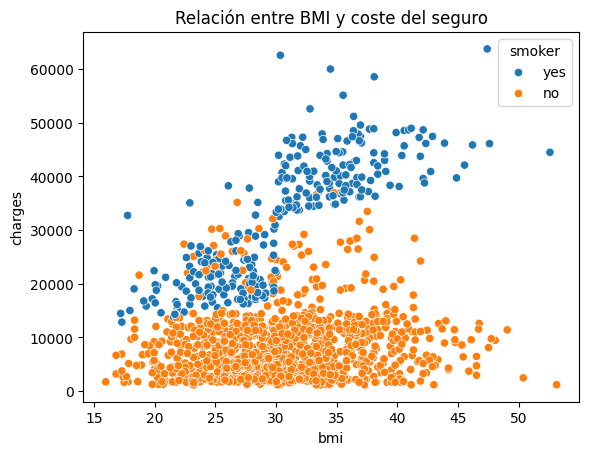

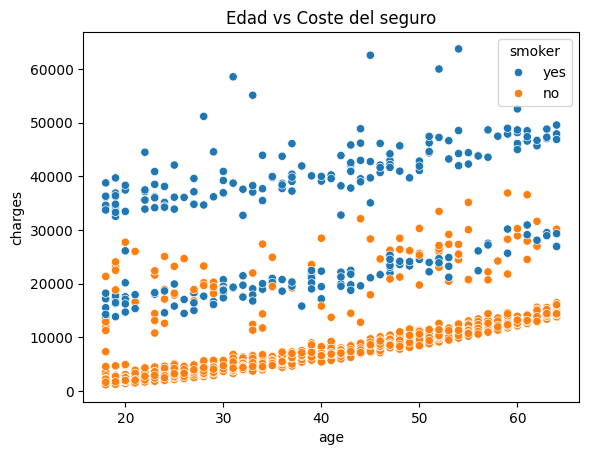

In [7]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Coste del seguro según fumador")
plt.show()

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Relación entre BMI y coste del seguro")
plt.show()

sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Edad vs Coste del seguro")
plt.show()


## ⚙️ Preprocesamiento de variables

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## 🔗 Matriz de correlación

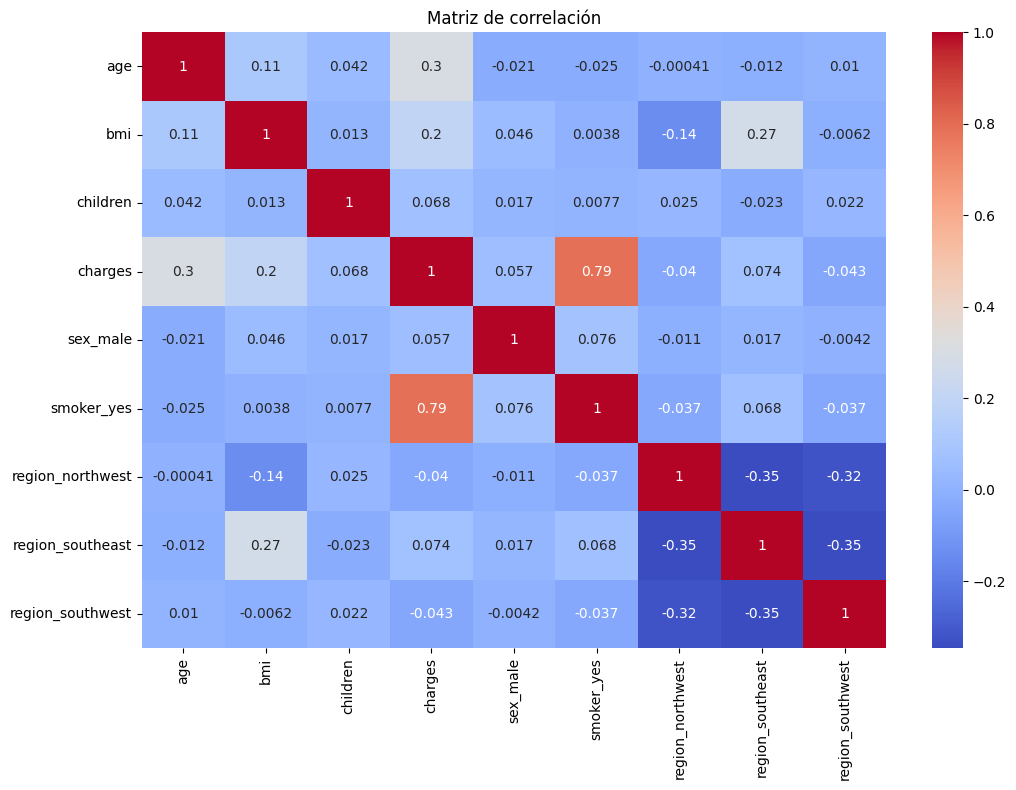

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


## ✂️ División de datos

In [10]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 📈 Modelo de Regresión Lineal

In [21]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.7835929767120724
RMSE: 5796.284659276272


In [13]:

# Mostrar coeficientes
pd.Series(modelo.coef_, index=X.columns).sort_values(ascending=False)


smoker_yes          23651.128856
children              425.278784
bmi                   337.092552
age                   256.975706
sex_male              -18.591692
region_northwest     -370.677326
region_southeast     -657.864297
region_southwest     -809.799354
dtype: float64

## 🔧 Regularización: Ridge y Lasso

In [14]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R2:", ridge.score(X_test, y_test))

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
print("Lasso R2:", lasso.score(X_test, y_test))


Ridge R2: 0.7832830144988214
Lasso R2: 0.7835376351805539


## 🧪 Modelo Polinómico

In [15]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)
print("Polynomial R2 Score:", r2_score(y_test, y_poly_pred))


Polynomial R2 Score: 0.8665830903164841
